## Weekly Level Full Categoties

In [1]:
# Load data using the pyarrow engine
import pandas as pd


from constants import (
    driver_behavior,
    vehicle_attributes,
    driver_attributes,
    driver_navigation,
    gis_attributes,
    record_day,
    target_mro,
)


file_name = "./Data/mro_daily_clean.csv"
data = pd.read_csv(file_name, index_col=0, engine="pyarrow")


selected_columns = (
    driver_navigation
    + driver_behavior
    + vehicle_attributes
    + driver_attributes
    + gis_attributes
    + record_day
    + target_mro
)

data = data[selected_columns]


data["purchase_time"] = (
    data["purchase_yr_nbr"].astype(int).astype(str)
    + "_"
    + data["purchase_mth_nbr"].astype(int).astype(str)
)


data = data[data["record_days"] >= 120]
data = data.drop(["purchase_yr_nbr", "purchase_mth_nbr"], axis=1)


weekly_level_mean = data.groupby(["id", "yr_nbr", "week_nbr"]).agg(
    {
        "mth_nbr": "first",
        # if exists mro = 1, then mro = 1
        "mro": "max",
        "hard_braking": "mean",
        "hard_acceleration": "mean",
        "speeding_sum": "mean",
        "day_mileage": "mean",
        "est_hh_incm_prmr_cd": "first",
        "purchaser_age_at_tm_of_purch": "first",
        "input_indiv_gndr_prmr_cd": "first",
        "gmqualty_model": "first",
        "umf_xref_finc_gbl_trim": "first",
        "engn_size": "first",
        "purchase_time": "first",
        "tavg": "mean",
        "record_days": "first",
        "random_avg_traffic": "mean",
    }
)

weekly_level_mean.reset_index(inplace=True)
weekly_level_mean

,id,yr_nbr,week_nbr,mth_nbr,mro,hard_braking,hard_acceleration,speeding_sum,day_mileage,est_hh_incm_prmr_cd,purchaser_age_at_tm_of_purch,input_indiv_gndr_prmr_cd,gmqualty_model,umf_xref_finc_gbl_trim,engn_size,purchase_time,tavg,record_days,random_avg_traffic
0,w4HClcKnwrzCv8KgwrjDi8Klwr3Cm8KVwqfCrsKowprClg==,2018,1,12,0.0,1.000000,1.000000,0.000000,6.203125,6.0,54.0,F,Regal,BASE_TRIM,2.0,2018_1,5.048431,596,12886.225115
1,w4HClcKnwrzCv8KgwrjDi8Klwr3Cm8KVwqfCrsKowprClg==,2018,3,1,0.0,0.500000,0.000000,2.000000,16.484375,6.0,54.0,F,Regal,BASE_TRIM,2.0,2018_1,15.092748,596,14554.620499
2,w4HClcKnwrzCv8KgwrjDi8Klwr3Cm8KVwqfCrsKowprClg==,2018,4,1,0.0,6.500000,0.833333,3.500000,53.302083,6.0,54.0,F,Regal,BASE_TRIM,2.0,2018_1,15.273847,596,14559.007102
3,w4HClcKnwrzCv8KgwrjDi8Klwr3Cm8KVwqfCrsKowprClg==,2018,5,1,0.0,8.571429,1.714286,4.714286,77.383929,6.0,54.0,F,Regal,BASE_TRIM,2.0,2018_1,15.005342,596,14433.908044
4,w4HClcKnwrzCv8KgwrjDi8Klwr3Cm8KVwqfCrsKowprClg==,2018,6,2,0.0,7.142857,1.428571,6.571429,50.343750,6.0,54.0,F,Regal,BASE_TRIM,2.0,2018_1,14.859090,596,14390.440682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434757,wrbCt8K1wrvDi8KtwrjCtMONwrvCrsKXwqbCqcKqwpzCnA==,2019,48,11,0.0,5.000000,0.666667,1.500000,80.958333,4.0,34.0,F,Envision,MIDLEVEL_TRIM,2.5,2018_1,15.293022,499,9881.400949
3434758,wrbCt8K1wrvDi8KtwrjCtMONwrvCrsKXwqbCqcKqwpzCnA==,2019,49,12,0.0,4.333333,0.333333,2.000000,65.213542,4.0,34.0,F,Envision,MIDLEVEL_TRIM,2.5,2018_1,14.654773,499,9743.572901
3434759,wrbCt8K1wrvDi8KtwrjCtMONwrvCrsKXwqbCqcKqwpzCnA==,2019,50,12,0.0,2.600000,0.400000,1.400000,91.200000,4.0,34.0,F,Envision,MIDLEVEL_TRIM,2.5,2018_1,14.872987,499,9732.679965
3434760,wrbCt8K1wrvDi8KtwrjCtMONwrvCrsKXwqbCqcKqwpzCnA==,2019,51,12,0.0,1.166667,0.000000,0.166667,82.893229,4.0,34.0,F,Envision,MIDLEVEL_TRIM,2.5,2018_1,12.262551,499,10792.873524


In [2]:
# set the length of historical time 4, 8, 16
time_window = 4
for i in range(1, time_window + 1):
    weekly_level_mean[f"hard_braking_{i}"] = weekly_level_mean.groupby("id")[
        "hard_braking"
    ].transform(lambda x: x.shift(i))
    weekly_level_mean[f"hard_acceleration_{i}"] = weekly_level_mean.groupby("id")[
        "hard_acceleration"
    ].transform(lambda x: x.shift(i))
    weekly_level_mean[f"speeding_sum_{i}"] = weekly_level_mean.groupby("id")[
        "speeding_sum"
    ].transform(lambda x: x.shift(i))
    weekly_level_mean[f"day_mileage_{i}"] = weekly_level_mean.groupby("id")[
        "day_mileage"
    ].transform(lambda x: x.shift(i))
    weekly_level_mean[f"tavg_{i}"] = weekly_level_mean.groupby("id")["tavg"].transform(
        lambda x: x.shift(i)
    )
    weekly_level_mean[f"random_avg_traffic_{i}"] = weekly_level_mean.groupby("id")[
        "random_avg_traffic"
    ].transform(lambda x: x.shift(i))

In [3]:
weekly_level_mean.dtypes

id                               object
yr_nbr                            int64
week_nbr                          int64
mth_nbr                           int64
mro                             float64
hard_braking                    float64
hard_acceleration               float64
speeding_sum                    float64
day_mileage                     float64
est_hh_incm_prmr_cd             float64
purchaser_age_at_tm_of_purch    float64
input_indiv_gndr_prmr_cd         object
gmqualty_model                   object
umf_xref_finc_gbl_trim           object
engn_size                       float64
purchase_time                    object
tavg                            float64
record_days                       int64
random_avg_traffic              float64
hard_braking_1                  float64
hard_acceleration_1             float64
speeding_sum_1                  float64
day_mileage_1                   float64
tavg_1                          float64
random_avg_traffic_1            float64


In [4]:
column_full = weekly_level_mean.columns.values.tolist()
features_remove = [
    "id",
    "yr_nbr",
    "week_nbr",
    "mth_nbr",
    "mro",
    "record_days",
    "gmqualty_model",
]
features = [item for item in column_full if item not in features_remove]
features

['hard_braking',
 'hard_acceleration',
 'speeding_sum',
 'day_mileage',
 'est_hh_incm_prmr_cd',
 'purchaser_age_at_tm_of_purch',
 'input_indiv_gndr_prmr_cd',
 'umf_xref_finc_gbl_trim',
 'engn_size',
 'purchase_time',
 'tavg',
 'random_avg_traffic',
 'hard_braking_1',
 'hard_acceleration_1',
 'speeding_sum_1',
 'day_mileage_1',
 'tavg_1',
 'random_avg_traffic_1',
 'hard_braking_2',
 'hard_acceleration_2',
 'speeding_sum_2',
 'day_mileage_2',
 'tavg_2',
 'random_avg_traffic_2',
 'hard_braking_3',
 'hard_acceleration_3',
 'speeding_sum_3',
 'day_mileage_3',
 'tavg_3',
 'random_avg_traffic_3',
 'hard_braking_4',
 'hard_acceleration_4',
 'speeding_sum_4',
 'day_mileage_4',
 'tavg_4',
 'random_avg_traffic_4']

In [5]:
from sklearn.model_selection import train_test_split

unique_ids = weekly_level_mean["id"].unique()

train_ids, val_ids = train_test_split(unique_ids, test_size=0.1, random_state=42)

train_data = weekly_level_mean[weekly_level_mean["id"].isin(train_ids)]
val_data = weekly_level_mean[weekly_level_mean["id"].isin(val_ids)]

# Check the lengths of the train and validation sets
print("Length of train_ids:", len(train_ids))
print("Length of val_ids:", len(val_ids))

Length of train_ids: 52955
Length of val_ids: 5884


In [6]:
import lightgbm as lgb

X_train = train_data[features]
y_train = train_data[target_mro]
X_valid = val_data[features]
y_valid = val_data[target_mro]


# make sure all object type columns are converted to category
for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")


train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)

/tmp/ipykernel_2418102/393272347.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/tmp/ipykernel_2418102/393272347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = X_valid[col].astype("category")
/tmp/ipykernel_2418102/393272347.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [7]:
params = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "average_precision"],
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 60,
    "max_depth": -1,
    "verbose": -1,
    "device_type": "gpu",
    # "bagging_fraction": 0.8,
    # "pos_bagging_fraction": 0.8,
    # "neg_bagging_fraction": 0.2,
}

In [8]:
num_round = 1000
bst = lgb.train(
    params,
    train_dataset,
    num_round,
    valid_sets=[valid_dataset],
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.623042	valid_0's binary_logloss: 0.172022	valid_0's average_precision: 0.0731378


In [9]:
# test this model with Precision, Recall, F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


def evaluate_model(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

    # compute Youden's J statistic
    youden_j_stat = tpr - fpr
    best_idx = np.argmax(youden_j_stat)  # find the index of the best threshold
    best_threshold = thresholds[best_idx]  # get the best threshold
    threshold = best_threshold
    # Convert probabilities to binary predictions using the best threshold
    y_pred_binary = np.where(y_pred > threshold, 1, 0)
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    accuracy = accuracy_score(y_true, y_pred_binary)
    auc = roc_auc_score(y_true, y_pred)
    average_precision = average_precision_score(y_true, y_pred)

    confusion = confusion_matrix(y_true, y_pred_binary)
    # return precision, recall, f1, accuracy, auc, average_precision
    return {
        "Best Threshold": threshold,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
        "auc": auc,
        "average_precision": average_precision,
        "confusion_matrix": confusion,
    }


# Evaluate the model on the validation set
y_pred = bst.predict(X_valid)
metrics = evaluate_model(y_valid, y_pred)
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])
print("AUC:", metrics["auc"])
print("Average Precision:", metrics["average_precision"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

Precision: 0.05816031286763537
Recall: 0.6238319350658209
F1 Score: 0.10640080039088858
Accuracy: 0.5528453628052241
AUC: 0.6230416548126511
Average Precision: 0.07313777387965754
Confusion Matrix:
 [[180789 148109]
 [  5515   9146]]


In [10]:
weekly_level_full_y_real = y_valid
weekly_level_full_y_pred = y_pred

In [11]:
# import matplotlib.pyplot as plt

# importances = bst.feature_importance()
# feature_names = bst.feature_name()

# plt.figure(figsize=(8, 10))
# plt.barh(feature_names, importances)
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance')
# plt.show()

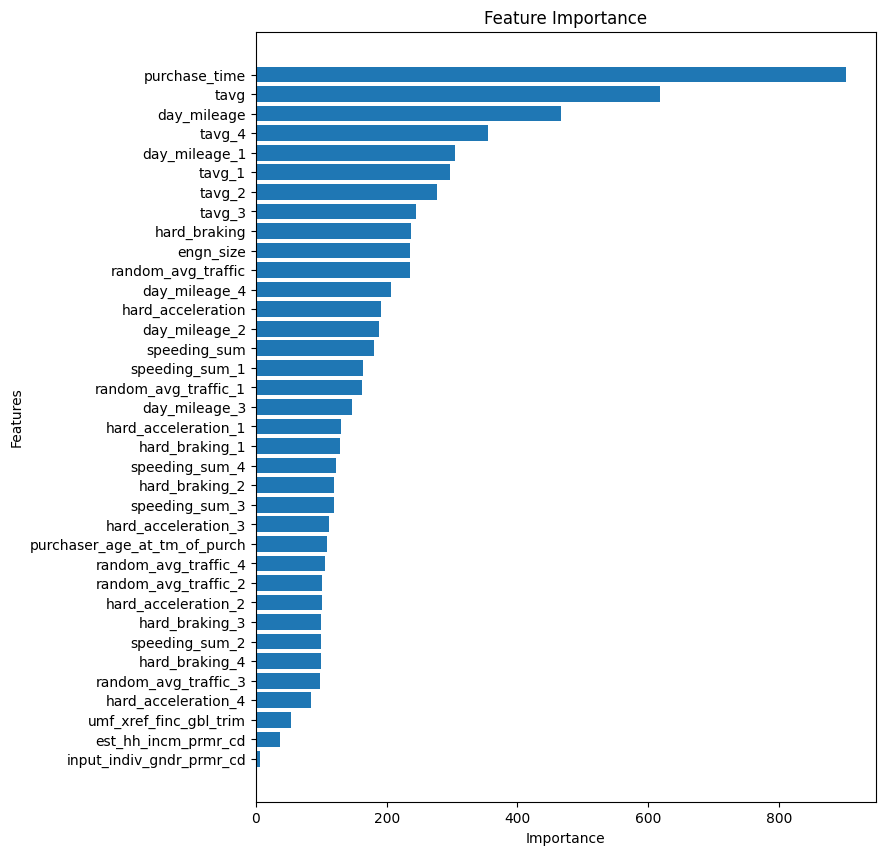

In [12]:
import matplotlib.pyplot as plt
import numpy as np

importances = bst.feature_importance()
feature_names = bst.feature_name()

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(8, 10))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

## Daily Level Sierria LD Data

In [13]:
data_Sierra_LD = data[data["gmqualty_model"] == "Sierra LD"]
data_Sierra_LD.reset_index(inplace=True, drop=True)

# add the features to the data_Sierra_LD
for i in range(1, time_window + 1):
    data_Sierra_LD[f"hard_braking_{i}"] = data_Sierra_LD.groupby("id")[
        "hard_braking"
    ].transform(lambda x: x.shift(i))
    data_Sierra_LD[f"hard_acceleration_{i}"] = data_Sierra_LD.groupby("id")[
        "hard_acceleration"
    ].transform(lambda x: x.shift(i))
    data_Sierra_LD[f"speeding_sum_{i}"] = data_Sierra_LD.groupby("id")[
        "speeding_sum"
    ].transform(lambda x: x.shift(i))
    data_Sierra_LD[f"day_mileage_{i}"] = data_Sierra_LD.groupby("id")[
        "day_mileage"
    ].transform(lambda x: x.shift(i))
    data_Sierra_LD[f"tavg_{i}"] = data_Sierra_LD.groupby("id")["tavg"].transform(
        lambda x: x.shift(i)
    )
    data_Sierra_LD[f"random_avg_traffic_{i}"] = data_Sierra_LD.groupby("id")[
        "random_avg_traffic"
    ].transform(lambda x: x.shift(i))

data_Sierra_LD

/tmp/ipykernel_2418102/4077201671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Sierra_LD[f"hard_braking_{i}"] = data_Sierra_LD.groupby("id")[
/tmp/ipykernel_2418102/4077201671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Sierra_LD[f"hard_acceleration_{i}"] = data_Sierra_LD.groupby("id")[
/tmp/ipykernel_2418102/4077201671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,id,yr_nbr,mth_nbr,week_nbr,hard_braking,hard_acceleration,speeding_sum,day_mileage,gmqualty_model,umf_xref_finc_gbl_trim,...,speeding_sum_3,day_mileage_3,tavg_3,random_avg_traffic_3,hard_braking_4,hard_acceleration_4,speeding_sum_4,day_mileage_4,tavg_4,random_avg_traffic_4
0,wpvCrMOHw4PCpMK3wqrCtsKtwrvDhMKXwqvCpsKnwpvCng==,2018,2,6,1,1,3.0,29.687500,Sierra LD,MIDLEVEL_TRIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wpvCrMOHw4PCpMK3wqrCtsKtwrvDhMKXwqvCpsKnwpvCng==,2018,2,6,5,0,3.0,38.968750,Sierra LD,MIDLEVEL_TRIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wpvCrMOHw4PCpMK3wqrCtsKtwrvDhMKXwqvCpsKnwpvCng==,2018,2,6,15,1,5.0,55.750000,Sierra LD,MIDLEVEL_TRIM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wpvCrMOHw4PCpMK3wqrCtsKtwrvDhMKXwqvCpsKnwpvCng==,2018,2,6,11,2,4.0,106.921875,Sierra LD,MIDLEVEL_TRIM,...,3.0,29.687500,23.100000,610.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,wpvCrMOHw4PCpMK3wqrCtsKtwrvDhMKXwqvCpsKnwpvCng==,2018,2,6,2,1,1.0,52.937500,Sierra LD,MIDLEVEL_TRIM,...,3.0,38.968750,23.300000,16925.130000,1.0,1.0,3.0,29.687500,23.100000,610.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528026,wp3CrMOHw4rCrMKuwqrCt8ONwr7CscKXwqzCpcKlwp3CnQ==,2019,12,52,0,1,0.0,22.953125,Sierra LD,UPLEVEL_TRIM,...,4.0,112.203125,11.800000,7212.610000,5.0,3.0,4.0,99.312500,11.000000,21564.570000
6528027,wp3CrMOHw4rCrMKuwqrCt8ONwr7CscKXwqzCpcKlwp3CnQ==,2019,12,52,6,0,7.0,59.546875,Sierra LD,UPLEVEL_TRIM,...,4.0,70.296875,5.300000,21903.860000,8.0,3.0,4.0,112.203125,11.800000,7212.610000
6528028,wp3CrMOHw4rCrMKuwqrCt8ONwr7CscKXwqzCpcKlwp3CnQ==,2019,12,52,9,6,9.0,103.656250,Sierra LD,UPLEVEL_TRIM,...,1.0,40.796875,15.999657,22378.374667,6.0,3.0,4.0,70.296875,5.300000,21903.860000
6528029,wp3CrMOHw4rCrMKuwqrCt8ONwr7CscKXwqzCpcKlwp3CnQ==,2019,12,52,2,2,4.0,33.406250,Sierra LD,UPLEVEL_TRIM,...,0.0,22.953125,16.014132,22368.854164,6.0,1.0,1.0,40.796875,15.999657,22378.374667


In [14]:
# validation on the Sierra LD with 
X_train = data_Sierra_LD[features]
y_train = data_Sierra_LD[target_mro]
X_valid = data_Sierra_LD[features]
y_valid = data_Sierra_LD[target_mro]
# make sure all object type columns are converted to category
for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)

# use bst model to predict the Sierra LD
y_pred = bst.predict(X_valid)
metrics = evaluate_model(y_valid, y_pred)
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])
print("AUC:", metrics["auc"])
print("Average Precision:", metrics["average_precision"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

/tmp/ipykernel_2418102/296162925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/tmp/ipykernel_2418102/296162925.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = X_valid[col].astype("category")
/tmp/ipykernel_2418102/296162925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Precision: 0.013706117842064939
Recall: 0.6469747733543555
F1 Score: 0.026843556708231603
Accuracy: 0.5624683767586275
AUC: 0.6457538588253756
Average Precision: 0.01956839528203339
Confusion Matrix:
 [[3632418 2834725]
 [  21495   39393]]


In [15]:
train_ids, val_ids = train_test_split(
    data_Sierra_LD["id"].unique(), test_size=0.1, random_state=42
)
train_data = data_Sierra_LD[data_Sierra_LD["id"].isin(train_ids)]
val_data = data_Sierra_LD[data_Sierra_LD["id"].isin(val_ids)]


X_train = train_data[features]
y_train = train_data[target_mro]
X_valid = val_data[features]
y_valid = val_data[target_mro]


for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)

/tmp/ipykernel_2418102/2731601671.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/tmp/ipykernel_2418102/2731601671.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = X_valid[col].astype("category")
/tmp/ipykernel_2418102/2731601671.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
params_fine = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "average_precision"],
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 40,
    "max_depth": 100,
    "verbose": -1,
    "device_type": "gpu",
    # add regularization
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
}

In [17]:
bst_finetune = lgb.train(
    params_fine,
    train_dataset,
    num_boost_round=100,
    valid_sets=[valid_dataset],
    init_model=bst,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[221]	valid_0's auc: 0.668654	valid_0's binary_logloss: 0.0504958	valid_0's average_precision: 0.0250036


In [18]:
# validation on the Sierra LD with fine-tune model
y_pred = bst_finetune.predict(X_valid)
metrics = evaluate_model(y_valid, y_pred)
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])
print("AUC:", metrics["auc"])
print("Average Precision:", metrics["average_precision"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

Precision: 0.015685306233837116
Recall: 0.5974261672991256
F1 Score: 0.030568054230649098
Accuracy: 0.6498886427834274
AUC: 0.6686535218549216
Average Precision: 0.025003586251772177
Confusion Matrix:
 [[422704 227232]
 [  2440   3621]]


In [19]:
daily_level_sierra_LD_y_real = y_valid
daily_level_sierra_LD_y_pred = y_pred

---

## Weekly Level Sierra LD Data

In [20]:
data_Sierra_LD = data[data["gmqualty_model"] == "Sierra LD"]
data_Sierra_LD.reset_index(inplace=True, drop=True)

weekly_level_data_sierra_LD = data_Sierra_LD.groupby(["id", "yr_nbr", "week_nbr"]).agg(
    {
        "mth_nbr": "first",
        # if exists mro = 1, then mro = 1
        "mro": "max",
        "hard_braking": "mean",
        "hard_acceleration": "mean",
        "speeding_sum": "mean",
        "day_mileage": "mean",
        "est_hh_incm_prmr_cd": "first",
        "purchaser_age_at_tm_of_purch": "first",
        "input_indiv_gndr_prmr_cd": "first",
        "gmqualty_model": "first",
        "umf_xref_finc_gbl_trim": "first",
        "engn_size": "first",
        "purchase_time": "first",
        "tavg": "mean",
        "record_days": "first",
        "random_avg_traffic": "mean",
    }
)

weekly_level_data_sierra_LD.reset_index(inplace=True)
# weekly_level_data_sierra_LD
for i in range(1, time_window + 1):
    weekly_level_data_sierra_LD[f"hard_braking_{i}"] = (
        weekly_level_data_sierra_LD.groupby("id")["hard_braking"].transform(
            lambda x: x.shift(i)
        )
    )
    weekly_level_data_sierra_LD[f"hard_acceleration_{i}"] = (
        weekly_level_data_sierra_LD.groupby("id")["hard_acceleration"].transform(
            lambda x: x.shift(i)
        )
    )
    weekly_level_data_sierra_LD[f"speeding_sum_{i}"] = (
        weekly_level_data_sierra_LD.groupby("id")["speeding_sum"].transform(
            lambda x: x.shift(i)
        )
    )
    weekly_level_data_sierra_LD[f"day_mileage_{i}"] = (
        weekly_level_data_sierra_LD.groupby("id")["day_mileage"].transform(
            lambda x: x.shift(i)
        )
    )
    weekly_level_data_sierra_LD[f"tavg_{i}"] = weekly_level_data_sierra_LD.groupby(
        "id"
    )["tavg"].transform(lambda x: x.shift(i))
    weekly_level_data_sierra_LD[f"random_avg_traffic_{i}"] = (
        weekly_level_data_sierra_LD.groupby("id")["random_avg_traffic"].transform(
            lambda x: x.shift(i)
        )
    )


# validation on the Sierra LD with
X_train = weekly_level_data_sierra_LD[features]
y_train = weekly_level_data_sierra_LD[target_mro]
X_valid = weekly_level_data_sierra_LD[features]
y_valid = weekly_level_data_sierra_LD[target_mro]
# make sure all object type columns are converted to category
for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)

# use bst model to predict the Sierra LD
y_pred = bst.predict(X_valid)
metrics = evaluate_model(y_valid, y_pred)
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])
print("AUC:", metrics["auc"])
print("Average Precision:", metrics["average_precision"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

/tmp/ipykernel_2418102/878145244.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/tmp/ipykernel_2418102/878145244.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = X_valid[col].astype("category")
/tmp/ipykernel_2418102/878145244.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Precision: 0.06318426811072657
Recall: 0.5812153959042092
F1 Score: 0.11397792846782884
Accuracy: 0.6068651834739909
AUC: 0.6357722613384322
Average Precision: 0.08016669239664552
Confusion Matrix:
 [[801583 516741]
 [ 25112  34852]]


In [21]:
train_ids, val_ids = train_test_split(
    weekly_level_data_sierra_LD["id"].unique(), test_size=0.1, random_state=42
)
train_data = weekly_level_data_sierra_LD[
    weekly_level_data_sierra_LD["id"].isin(train_ids)
]
val_data = weekly_level_data_sierra_LD[weekly_level_data_sierra_LD["id"].isin(val_ids)]
X_train = train_data[features]
y_train = train_data[target_mro]
X_valid = val_data[features]
y_valid = val_data[target_mro]
# make sure all object type columns are converted to category
for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)
params_fine = {
    "objective": "binary",
    "metric": ["auc", "binary_logloss", "average_precision"],
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 40,
    "max_depth": 100,
    "verbose": -1,
    "device_type": "gpu",
    # add regularization
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
}
bst_finetune_week = lgb.train(
    params_fine,
    train_dataset,
    num_boost_round=100,
    valid_sets=[valid_dataset],
    init_model=bst,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)
# validation on the Sierra LD with fine-tune model

/tmp/ipykernel_2418102/2738864907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype("category")
/tmp/ipykernel_2418102/2738864907.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = X_valid[col].astype("category")
/tmp/ipykernel_2418102/2738864907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.632134	valid_0's binary_logloss: 0.176212	valid_0's average_precision: 0.0804752


In [22]:
# validation on the Sierra LD with fine-tune model
y_pred = bst_finetune_week.predict(X_valid)
metrics = evaluate_model(y_valid, y_pred)
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])
print("AUC:", metrics["auc"])
print("Average Precision:", metrics["average_precision"])
print("Confusion Matrix:\n", metrics["confusion_matrix"])

Precision: 0.06697950422961997
Recall: 0.5266379880873594
F1 Score: 0.11884404286301012
Accuracy: 0.6542529813355211
AUC: 0.6321343675920598
Average Precision: 0.08047519110815152
Confusion Matrix:
 [[86133 44339]
 [ 2861  3183]]


In [23]:
weekly_level_sierra_LD_y_real = y_valid
weekly_level_sierra_LD_y_pred = y_pred

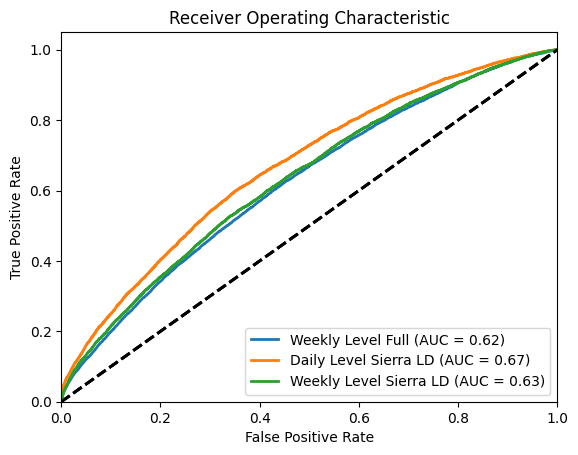

In [24]:
# draw roc curve on weekly_level_full, daily_level_sierra_LD, weekly_level_sierra_LD
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        label=f"{label} (AUC = {roc_auc:.2f})",
        linewidth=2,
    )
    plt.plot([0, 1], [0, 1], "k--", linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")


# plot the roc curve
plot_roc_curve(weekly_level_full_y_real, weekly_level_full_y_pred, "Weekly Level Full")
plot_roc_curve(
    daily_level_sierra_LD_y_real, daily_level_sierra_LD_y_pred, "Daily Level Sierra LD"
)
plot_roc_curve(
    weekly_level_sierra_LD_y_real,
    weekly_level_sierra_LD_y_pred,
    "Weekly Level Sierra LD",
)
plt.show()